In [22]:
from datetime import date, timedelta, datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import functions as f

In [23]:
def plot_top_5_cryptos_from_data(data, tokens):
    
    latest_caps = []
    
    for token_name, df in zip(tokens.values(), data):
        if 'market_cap' not in df.columns:
            continue  # if there is no data about capitalisation
        last_row = df.dropna(subset=['market_cap']).iloc[-1]
        market_cap = last_row['market_cap']
        latest_caps.append((token_name, market_cap))

    # sort top-5 and take the most popular ones
    top5 = sorted(latest_caps, key=lambda x: x[1], reverse=True)[:5]
    
    labels = [item[0] for item in top5]
    values = [item[1] for item in top5]

    plt.figure(figsize=(7, 7))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Top-5 Kryptowährungen nach Marktkapitalisierung (aktuell)')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


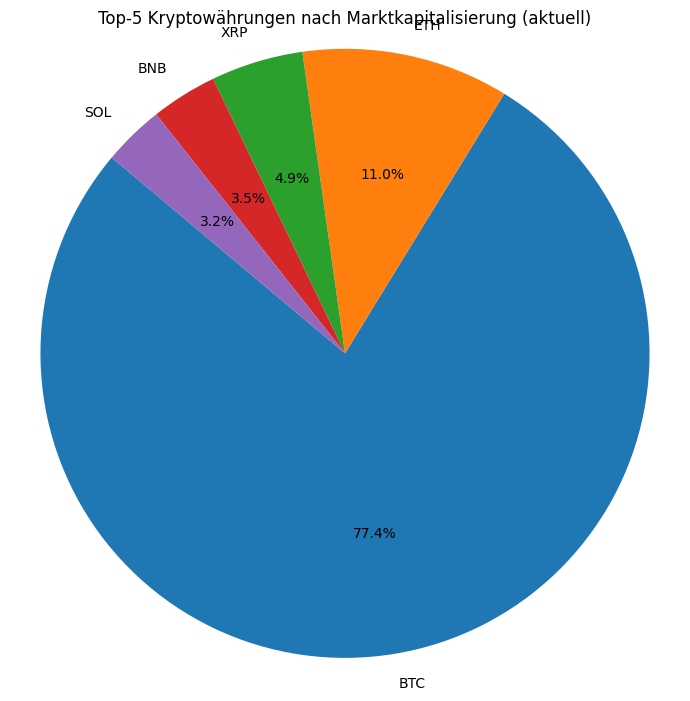

In [24]:
tokens = {'bitcoin': 'BTC', 'ethereum': 'ETH', 'ripple': 'XRP', 'binancecoin': 'BNB', 'solana': 'SOL',
          'dogecoin': 'DOGE', 'cardano': 'ADA', 'tron': 'TRX', 'chainlink': 'LINK', 'avalanche-2': 'AVAX'}

data = [f.parse_token_data(token, 365) for token in tokens.keys()]
plot_top_5_cryptos_from_data(data, tokens)


In [25]:
def plot_bitcoin_marketcap_1y_from_df(df):
    

    if 'market_cap' not in df.columns:
        print("Ошибка: в данных отсутствует колонка 'market_cap'.")
        return

#sicherstellen, dass keine Nan gibt
    df = df.sort_index().dropna(subset=['market_cap'])

    # Обрезаем до последних 365 дней, если индекс — datetime
    df_last_year = df.last('365D')

    plt.figure(figsize=(10, 5))
    plt.plot(df_last_year.index, df_last_year['market_cap'], color='orange')
    plt.title('Dynamik der Bitcoin-Marktkapitalisierung im letzten Jahr')
    plt.xlabel('Datum')
    plt.ylabel('Kapitalisierung (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_20452\1955003209.py:12: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_last_year = df.last('365D')


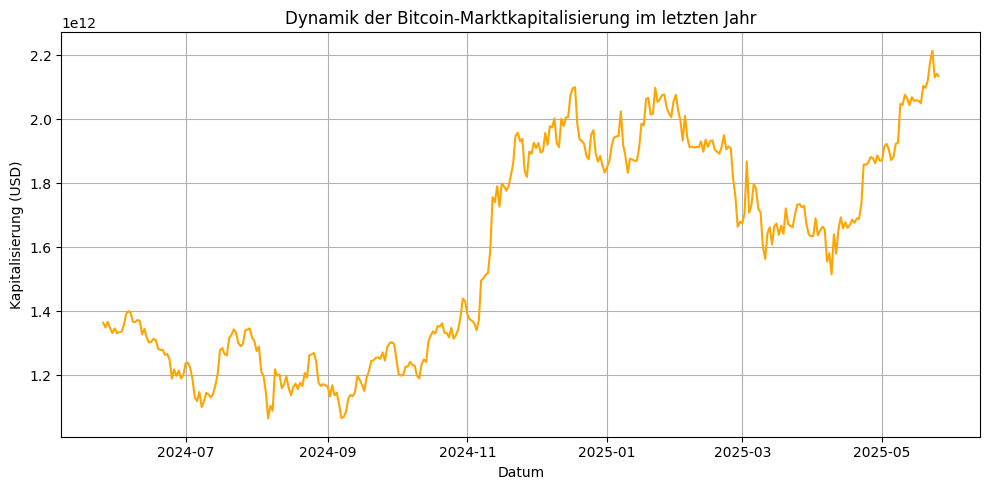

In [26]:
token = 'bitcoin'
days = 365  

df = f.parse_token_data(token, days)
plot_bitcoin_marketcap_1y_from_df(df)
